**Table of contents**<a id='toc0_'></a>    
- [Get images with DuckDuckGo](#toc1_1_)    
- [Read images with OpenCV](#toc2_)    
  - [B&W images](#toc2_1_)    
  - [Color images](#toc2_2_)    
    - [Split into BGR, HSV](#toc2_2_1_)    
- [Image Manipulations](#toc3_)    
  - [Cropping](#toc3_1_)    
  - [Resizing](#toc3_2_)    
    - [To a specific dimension](#toc3_2_1_)    
    - [While maintaining aspect ratio](#toc3_2_2_)    
  - [Flipping](#toc3_3_)    
  - [Brightness control - Addition](#toc3_4_)    
  - [Contrast control - multiplication](#toc3_5_)    
  - [Thresholding](#toc3_6_)    
    - [Application: OCR](#toc3_6_1_)    
- [Demo - live image manipulation](#toc4_)    
- [References](#toc5_)    
- [Extra](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from utils import search_images_ddg, download_images

## <a id='toc1_1_'></a>[Get images with DuckDuckGo](#toc0_)

In [15]:
search_key = 'logos'
url_set = search_images_ddg(search_key, max_n=50)
download_images(image_urls=url_set, image_prefix=search_key.replace(" ", "_"), output_folder=f"img/ocr/captcha")

Downloaded: img/ocr/captcha\logos_1.jpg
Downloaded: img/ocr/captcha\logos_2.png
Downloaded: img/ocr/captcha\logos_3.png
Downloaded: img/ocr/captcha\logos_4.jpg
Downloaded: img/ocr/captcha\logos_5.gif
Downloaded: img/ocr/captcha\logos_6.jpg
Downloaded: img/ocr/captcha\logos_7.jpg
Downloaded: img/ocr/captcha\logos_8.jpg
Downloaded: img/ocr/captcha\logos_9.png
Downloaded: img/ocr/captcha\logos_10.jpg
Downloaded: img/ocr/captcha\logos_11.jpg
Downloaded: img/ocr/captcha\logos_12.png
Downloaded: img/ocr/captcha\logos_13.png
Downloaded: img/ocr/captcha\logos_14.jpg
Failed to download https://www.ddesignerr.com/wp-content/uploads/2013/05/adidas-logo.jpg (Status code: 406)
Downloaded: img/ocr/captcha\logos_16.jpg
Downloaded: img/ocr/captcha\logos_17.jpg
Downloaded: img/ocr/captcha\logos_18.png
Failed to download https://unitedlabelcorp.com/wdpr/wp-content/uploads/2021/02/Mmrs9_syT.png.jpeg (Status code: 404)
Failed to download http://landt.co/wp-content/uploads/2016/07/logos-all1.jpeg (Status c

# <a id='toc2_'></a>[Read images with OpenCV](#toc0_)

## <a id='toc2_1_'></a>[B&W images](#toc0_)

In [ ]:
img_path = "img/image-manipulation/checkered_board/checkered_board_1.jpg"

# We can display the image directly in the Jupyter notebook
Image(filename=img_path)

In [ ]:
# Read image as gray scale.
cb_img = cv2.imread(img_path, 0)
print(cb_img)

In [ ]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

## <a id='toc2_2_'></a>[Color images](#toc0_)

In [ ]:
# Read in image
img_path = "img/image-manipulation/landscape/landscape_1.jpg"

img = cv2.imread(img_path, 1)

# print the size  of image
print("Image size (H, W, C) is:", img.shape)

# print data-type of image
print("Data type of image is:", img.dtype)

In [ ]:
# OpenCV stores images in BGR format
plt.imshow(img)

In [ ]:
# ... but matplotlib stores images in RGB format
plt.imshow(img[:, :, ::-1])

# Alternatively
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### <a id='toc2_2_1_'></a>[Split into BGR, HSV](#toc0_)

- Blue, green, red
- Hue, saturation, value

In [ ]:
# Split the image into the B,G,R components
b, g, r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_rgb);   plt.title("Original");

# <a id='toc3_'></a>[Image Manipulations](#toc0_)

## <a id='toc3_1_'></a>[Cropping](#toc0_)

In [ ]:
cropped_region = img_rgb[200:400, 300:600]
plt.imshow(cropped_region)

## <a id='toc3_2_'></a>[Resizing](#toc0_)

### <a id='toc3_2_1_'></a>[To a specific dimension](#toc0_)

In [ ]:
# Resizing
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### <a id='toc3_2_2_'></a>[While maintaining aspect ratio](#toc0_)

In [ ]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

## <a id='toc3_3_'></a>[Flipping](#toc0_)

In [ ]:
img_rgb_flipped_horz = cv2.flip(img_rgb, 1)
img_rgb_flipped_vert = cv2.flip(img_rgb, 0)
img_rgb_flipped_both = cv2.flip(img_rgb, -1)

# Show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_rgb);plt.title("Original");

## <a id='toc3_4_'></a>[Brightness control - Addition](#toc0_)

In [ ]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

## <a id='toc3_5_'></a>[Contrast control - multiplication](#toc0_)

In [ ]:
# Initial manipulation
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

In [ ]:
# Handling overflow, i.e. pixels that are higher than 255
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);       plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

## <a id='toc3_6_'></a>[Thresholding](#toc0_)

In [ ]:
img_path = "img/ocr/building_windows/building_windows_1.jpg"
img_read = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

### <a id='toc3_6_1_'></a>[Application: OCR](#toc0_)

In [ ]:
# Read the original image
img_path = "img/ocr/handwritten_docs/handwritten_docs_1.jpg"
img_read = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

OCR use-cases:
- [Captchas](https://huggingface.co/keras-io/ocr-for-captcha)
- [Manga](https://huggingface.co/TeamFnord/manga-ocr)

In [ ]:
# !pip install huggingface_hub
# !pip install tf-keras

## Masking - bitwise operations

### Background image

(600, 600, 3)


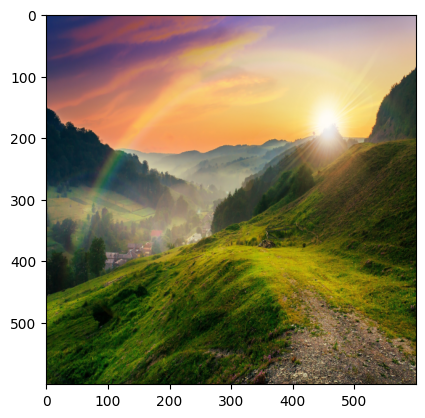

In [39]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("img/image-manipulation/landscape/landscape_1.jpg")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, (600, 600), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Foreground image

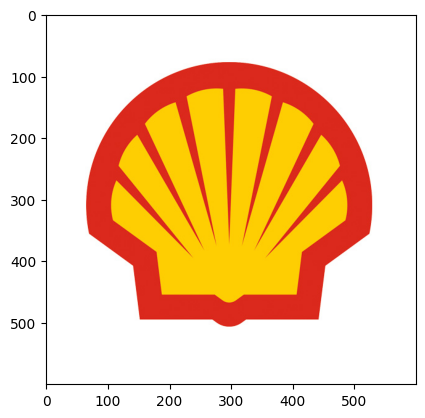

In [43]:
img_path = "img/image-manipulation/logos/logos_4.jpg"
img = cv2.imread(img_path)[:600, :600]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

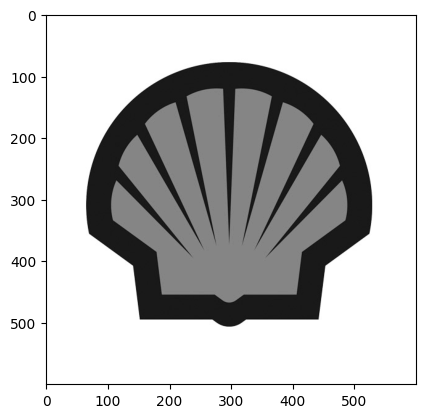

In [28]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

(600, 600)


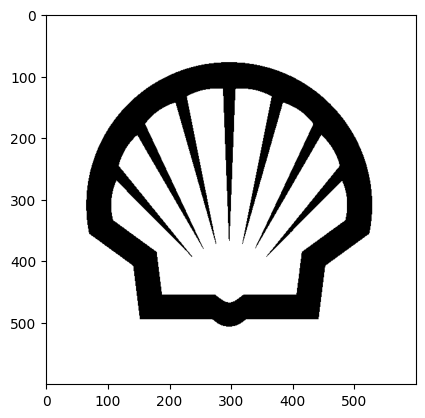

In [35]:

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

### Combine foreground & background

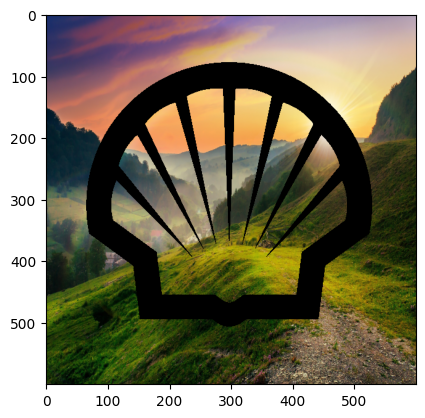

In [47]:
# Create colorful background "behind" the logo lettering
img_background_1 = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background_1) 

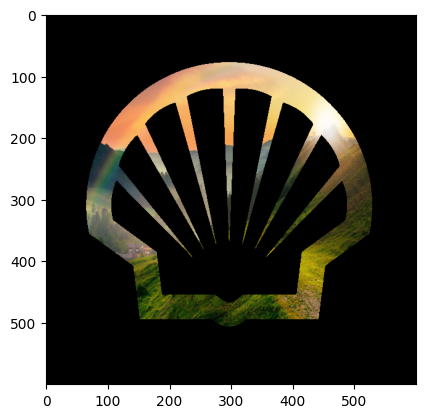

In [48]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

# Create colorful background "behind" the logo lettering
img_background_2 = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask_inv)
plt.imshow(img_background_2) 

### Use foreground from initial logo

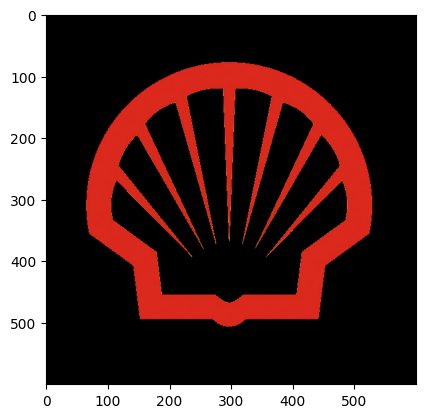

In [44]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

True

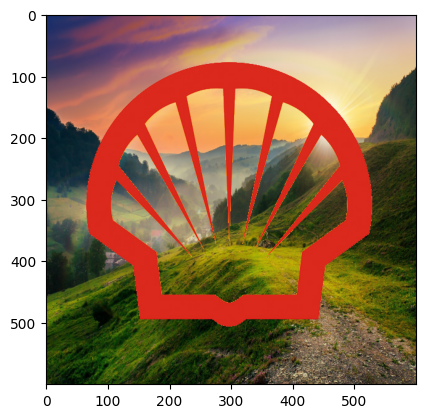

In [49]:
# Add the two previous results obtain the final result
result = cv2.add(img_background_1, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])

True

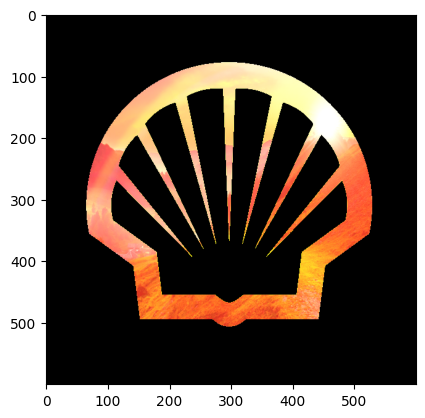

In [50]:
# Add the two previous results obtain the final result
result = cv2.add(img_background_2, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])

# <a id='toc4_'></a>[Demo - live image manipulation](#toc0_)

To access your camera, run the `camera.py` script in your terminal. To run the demo, use the `camera_demo.py` instead.

# <a id='toc5_'></a>[References](#toc0_)

The code and examples were sourced from the [OpenCV Bootcamp](https://courses.opencv.org/courses/course-v1:OpenCV+Bootcamp+CV0/course/).

# <a id='toc6_'></a>[Extra](#toc0_)

- [Pose estimation](https://courses.opencv.org/courses/course-v1:OpenCV+Bootcamp+CV0/courseware/457799bde2064b749df7fb0c0a741b5f/f9b682ac8b71470f963bc9c84ae3db39/1?activate_block_id=block-v1%3AOpenCV%2BBootcamp%2BCV0%2Btype%40vertical%2Bblock%400fb04585ef8e48819741446b1ec3bdbe)
- [Image alignment](https://courses.opencv.org/courses/course-v1:OpenCV+Bootcamp+CV0/courseware/457799bde2064b749df7fb0c0a741b5f/e598b2c0c85f4d07bf509f6433c9efea/1?activate_block_id=block-v1%3AOpenCV%2BBootcamp%2BCV0%2Btype%40vertical%2Bblock%4062549c7193e94ac78c722367efe87270)